# Housing Prices Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-23 19:22:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3%  816K 2s
    50K .......... .......... .......... .......... ..........  7% 3.10M 1s
   100K .......... .......... .......... .......... .......... 10% 1.43M 1s
   150K .......... .......... .......... .......... .......... 14% 4.59M 1s
   200K .......... .......... .......... .......... .......... 17% 1.58M 1s
   250K .......... .......... .......... .......... .......... 21% 2.05M 1s
   300K .......... .......... .......... .......... .......... 25% 5.46M 1s
   350K .......... .......... ..

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

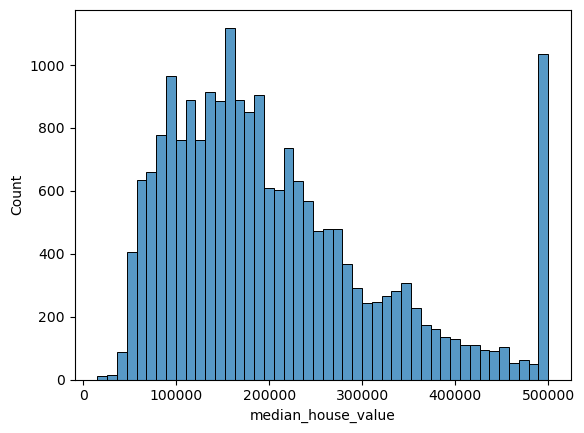

In [5]:
sns.histplot(df.median_house_value)

## Data Preparation

In [6]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [8]:
df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [9]:
columns = [
    'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value'
]

df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

In [10]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

In [11]:
df.population.describe().round(2)

count    15687.00
mean      1466.32
std       1180.39
min          3.00
25%        802.00
50%       1195.00
75%       1777.00
max      35682.00
Name: population, dtype: float64

## Validation Framework

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val- n_test

In [13]:
n, n_val + n_test + n_train

(15687, 15687)

In [14]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [15]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
len(df), len(df_train) + len(df_val) + len(df_test)

(15687, 15687)

In [18]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [21]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
def prepare_X(df, features, value_to_fill=0.0):
    df = df.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(value_to_fill)
    X = df_num.values

    return X

In [24]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [25]:
features = [*df_train.columns]

### Question 3 (filling with 0)

In [26]:
X_train = prepare_X(df_train, features=features, value_to_fill=0.0)
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [27]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(-9.763249477337387,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

<AxesSubplot:ylabel='Count'>

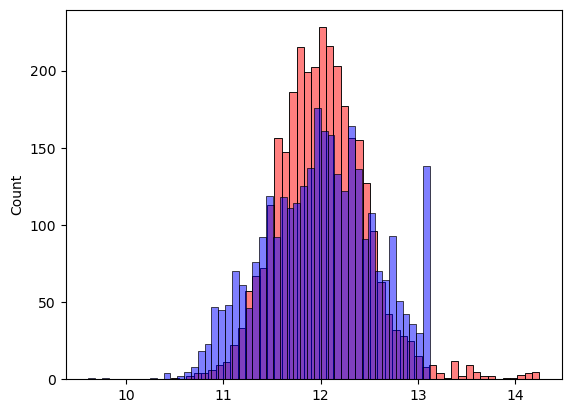

In [28]:
X_val = prepare_X(df_val, features=features, value_to_fill=0.0)
y_pred = w0 + X_val.dot(w)

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [29]:
round(rmse(y_val, y_pred), 2)

0.34

### Question 3 (filling with mean)

In [30]:
X_train = prepare_X(df_train, features=features, value_to_fill=df_train.total_bedrooms.mean())
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [31]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(-9.886133215670235,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

<AxesSubplot:ylabel='Count'>

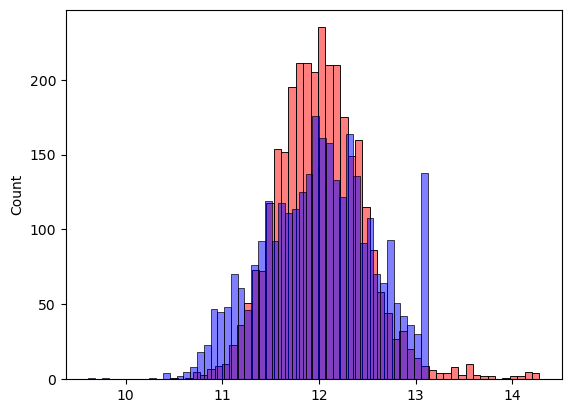

In [32]:
X_val = prepare_X(df_val, features=features, value_to_fill=df_train.total_bedrooms.mean())
y_pred = w0 + X_val.dot(w)

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [33]:
round(rmse(y_val, y_pred), 2)

0.34

### Question 4

In [34]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [35]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, features=features, value_to_fill=0.0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, features=features, value_to_fill=0.0)
    y_pred = w0 + X_val.dot(w)

    score = round(rmse(y_val, y_pred), 2)

    print(r, w0, score)

0 -9.763249477337387 0.34
1e-06 -9.763249477337387 0.34
0.0001 -9.763249477337387 0.34
0.001 -9.763249477337387 0.34
0.01 -9.763249477337387 0.34
0.1 -9.763249477337387 0.34
1 -9.763249477337387 0.34
5 -9.763249477337387 0.34
10 -9.763249477337387 0.34


### Question 5

In [36]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for s in seed_values:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    features = [*df_train.columns]
    X_train = prepare_X(df_train, features=features, value_to_fill=0.0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, features=features, value_to_fill=0.0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    scores.append(score)


In [37]:
scores

[0.33773871601007166,
 0.3377999353659855,
 0.3384287006764036,
 0.33200494683043624,
 0.33944518625561937,
 0.3433819705292111,
 0.3385330211772295,
 0.3468747697293593,
 0.35127368659618025,
 0.33415582665207333]

In [38]:
round(np.std(scores), 3)

0.005

### Question 6

In [39]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [40]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,32.82,-117.05,16.0,4046.0,731.0,1684.0,701.0,4.2312
1,33.91,-118.00,19.0,5166.0,770.0,2374.0,753.0,5.9790
2,37.25,-121.96,35.0,1018.0,169.0,484.0,174.0,6.1648
3,37.30,-121.89,47.0,1604.0,284.0,639.0,278.0,5.8415
4,33.96,-118.14,34.0,2744.0,541.0,1333.0,503.0,4.0536


In [41]:
features = [*df_full_train.columns]
features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [42]:
X_full_train = prepare_X(df_full_train, features=features, value_to_fill=0.0)
X_full_train

array([[  32.82  , -117.05  ,   16.    , ..., 1684.    ,  701.    ,
           4.2312],
       [  33.91  , -118.    ,   19.    , ..., 2374.    ,  753.    ,
           5.979 ],
       [  37.25  , -121.96  ,   35.    , ...,  484.    ,  174.    ,
           6.1648],
       ...,
       [  32.85  , -116.99  ,   32.    , ..., 3025.    ,  948.    ,
           4.0931],
       [  38.48  , -122.68  ,   15.    , ...,  716.    ,  259.    ,
           5.3409],
       [  37.29  , -121.95  ,   30.    , ..., 1834.    ,  824.    ,
           3.4505]])

In [43]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([12.19096408, 12.56094947, 12.82638297, ..., 11.80709396,
       12.40738359, 12.46844076])

In [44]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(-9.724839216825405,
 array([-2.68080162e-01, -2.55541948e-01,  1.73222785e-03, -3.39654801e-05,
         2.84921074e-04, -1.50329048e-04,  3.98733007e-04,  1.81391701e-01]))

In [45]:
X_test = prepare_X(df_test, features=features, value_to_fill=0.0)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 2)
score

0.33